# **PHYS 481 - Computational Physics II**

## **Assignment #3 - ODEs**

### **NAME:** Scott Salmon

### **UCID:** 30093320

### **FILE:** a3_scottsalmon.ipynb

### **DATES:** 2024/09/21 - 2024/09/27


### Question 1
a. [1 pt] For the equation $𝑦^{′′} + sin(𝑡) + 1 = 0$  write down the set of first-order ODEs in terms of
the state vector $𝑆 = [𝑦, 𝑦^′]^𝑇$ (see notes, or chapter 22). This is only about 1 or 2 lines. (Don’t
overthink it!)


Answer: 


If $𝑆 = [𝑦, 𝑦^′]^𝑇$, then we can define $S_1 = y$ and $S_2 = y'$. Using this, we know that:

\begin{align*}

    \frac{dS_1}{dt} &= S_2 \\\\

    \frac{dS_2}{dt} &= -sin(t) - 1 

\end{align*}

Therefore:

$$\frac{d}{dt}\begin{bmatrix}S_1\\S_2\end{bmatrix} = \begin{bmatrix}S_2\\-\sin(t)-1\end{bmatrix}$$



b. [8 pts] Write a general function to integrate second-order ODEs using Euler’s method. The
function should accept a function $𝐹 = \frac{𝑑𝑆}{𝑑𝑡}$ (which depends on 𝑆 and 𝑡), an interval, an initial
value vector 𝑆 and a number of steps to integrate. It should return the step points 𝑥𝑛 and the
solution to the ODE 𝑦𝑛 at all the step points. Use it to integrate the ODE from part a on the
interval $[0, 𝜋/2]$ with the initial values $𝑦(0) = 0$ and $𝑦^′(0) = 1$. Compare the results using different
numbers of steps and compare to the analytic result $𝑦 = 𝑐_1 + 𝑐_2𝑥 − \frac{𝑥^2}{2} + sin (𝑥)$.

Final position using 5 steps: 0.29646869
Final position using 10 steps: 0.03937887
Final position using 25 steps: -0.12266941
Final position using 100 steps: -0.20572641
Final position using 1000 steps: -0.23089676

Final position using analytic solution: -0.23370055


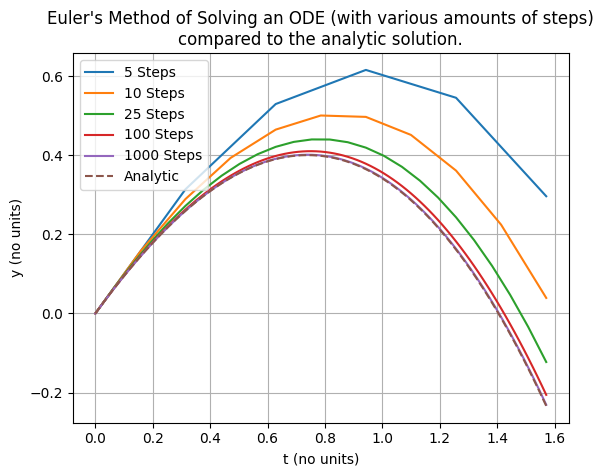

In [1]:
# Load standard libraries for numerical methods and plotting.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

def dS(vector, t):

    '''This function returns the derivative of the State Vector S = [y, y']^T, as solved in q1a.'''

    S_1 = vector[1]                                     #d/dt (S_1) = S_2 as shown above in q1a
    S_2 = -np.sin(t) - 1                                #d/dt (S_2) = -sin(t) - 1 as shown above in q1a

    return(np.array([S_1, S_2]))

def Euler(dF, interval, position, n):
    
    '''This function performs differentiation using Euler's method. Requires an interval array, a initial position array, and integer number of steps.'''

    t = np.linspace(interval[0], interval[1], n+1)      #makes time array between 0-pi/2 with n+1 steps
    dt = t[1] - t[0]                                    #finds difference in time between each step
    
    output = np.zeros_like(t)                           #initializing arrays
    output[0] = position[0]                             #setting first position that we already know
    
    i = 0
    while(i<n):
        position = position + dt*dF(position, t[i])     #updating position for every time step
        output[i+1] = position[0]                       #saving position to output array
        i += 1
        
    return t, output

interval = np.array([0,np.pi/2])                        #[0, pi/2] interval
initial_values = np.array([0,1])                        #y(0) = 0, y'(0) = 1
step_count = [5, 10, 25, 100, 1000]                     #various step totals we tested

#initializing our plot
plt.figure()
plt.title("Euler's Method of Solving an ODE (with various amounts of steps)\ncompared to the analytic solution.")
plt.xlabel('t (no units)')
plt.ylabel('y (no units)')
plt.grid('True')

#runs Euler function at various amounts of steps, and does our print statement
for n_steps in step_count:
    t, y = Euler(dS, interval, initial_values, n_steps)
    print("Final position using %0.1i steps: %0.8f"%(n_steps, y[-1]))
    plt.plot(t, y)

#creates the analytic plot
t = np.linspace(interval[0],interval[1],1000)
analytic = 0.0*t-0.5*t**2+np.sin(t)
print("\nFinal position using analytic solution: %0.8f"%(analytic[-1]))
plt.plot(t, analytic, '--')

plt.legend(['5 Steps', '10 Steps', '25 Steps', '100 Steps','1000 Steps', 'Analytic'], loc='upper left')
plt.show()

c. [8 pts] Repeat part b but use RK4 integration instead of Euler’s method.

Final position using 5 steps: -0.23371608
Final position using 10 steps: -0.23370152
Final position using 25 steps: -0.23370057
Final position using 100 steps: -0.23370055
Final position using 1000 steps: -0.23370055

Final position using analytic solution: -0.23370055


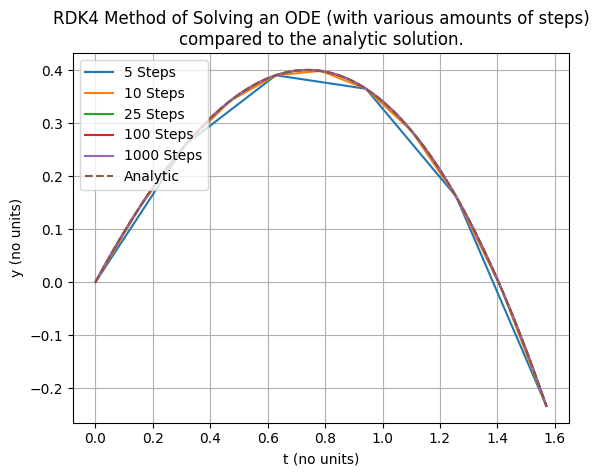

In [2]:
def RK4(dF, interval, position, n):

    '''This function performs differentiation using the Runge-Kutta method. Requires an interval array, a initial position array, and integer number of steps.'''
    
    t = np.linspace(interval[0], interval[1], n+1)      #makes time array between 0-pi/2 with n+1 steps
    dt = t[1] - t[0]                                    #finds difference in time between each step
    
    output = np.zeros_like(t)                           #initializing arrays
    output[0] = position[0]

    i = 0
    
    while(i<n):

        #RK4 algorithm
        k0=dF(position, t[i])
        k1=dF(position + dt * k0/2, t[i]+ dt/2)
        k2=dF(position + dt * k1/2, t[i]+ dt/2)
        k3=dF(position + dt * k2, t[i] + dt)
        
        position = position + dt*(k0/6 +k1/3 +k2/3 + k3/6)
        output[i+1] = position[0]                               #updates newest output value
        i += 1

    return t, output

interval = np.array([0, np.pi/2])         #[0, pi/2] interval
initial_values = np.array([0,1])          #y(0) = 0, y'(0) = 1
step_count = [5, 10, 25, 100, 1000]       #various step totals we tested

#initializing our plot
plt.figure()
plt.title("RDK4 Method of Solving an ODE (with various amounts of steps)\ncompared to the analytic solution.")
plt.xlabel('t (no units)')
plt.ylabel('y (no units)')
plt.grid('True')

#runs RK4 function at various amounts of steps, and does our print statement
for n_steps in step_count:
    t, y = RK4(dS, interval, initial_values, n_steps)
    print("Final position using %0.1i steps: %0.8f"%(n_steps, y[-1]))
    plt.plot(t, y)

#creates the analytic plot
t = np.linspace(interval[0],interval[1],1000)
analytic = -0.5*t**2+np.sin(t)
print("\nFinal position using analytic solution: %0.8f"%(analytic[-1]))
plt.plot(t, analytic, '--')

plt.legend(['5 Steps', '10 Steps', '25 Steps', '100 Steps','1000 Steps', 'Analytic'], loc = 'upper left')
plt.show()


d. [1 pt] Using Euler’s method in part b, each step yields a new value (at $𝑡_𝑛$) that is systematically too large. Why? 

Answer:

- Euler's Method is a first-order method that uses the slope at the current point to predict what the next point will be. This becomes problematic because this model is assuming the slope will be consistent between data points which is not true, especially when the slope is changing quickly.

- In the case of a concave down function (as seen in the first figure), the actual slope decreases as the curve flattens. However, Euler's method uses the slope from the previous step which tends to overestimate the value at the next point. This systematic overestimation occurs because the method does not account for the changing slope. The error accumulates, causing each calculated value to be consistently too large. A similar phenomonon occurs for a function that is concave upwards, however in that case Euler's method will underestimate the value at the next point for the exact same reasons in reverse. This is less relevant for this specific problem because the function we are modelling is concave down, however it is important in understanding why Euler's method over/under estimates the actual solution.

- This error is reduced significantly with smaller small step sizes, as the local error decreases. However, the global error still accumulates over multiple steps. In the first figure, the solution is a concave down function, so Euler's method overestimates the actual curve, which aligns with the observation that every plot created using Euler's method is larger than the analytic method, particularly the plots with a small amount of steps.



---------

### Question 2

a. [8 pts] For $𝑦^{′′} + sin(𝑡) + 1 = 0$ (same ODE as in question 1) and the boundary values $𝑦(0) = 0$
and $𝑦 (𝜋/2) = 1$, use a shooting method to solve the equation on the interval $[0, 𝜋/2]$. Compare to
the analytic result.

Iteration number: 00	Current y(𝜋/2) = -0.233700741	Current y'(0) = 1.000000000

Iteration number: 01	Current y(𝜋/2) = 0.551697422	Current y'(0) = 1.500000000
Iteration number: 02	Current y(𝜋/2) = 0.944396504	Current y'(0) = 1.750000000
Iteration number: 03	Current y(𝜋/2) = 1.140746045	Current y'(0) = 1.875000000
Iteration number: 04	Current y(𝜋/2) = 1.042571274	Current y'(0) = 1.812500000
Iteration number: 05	Current y(𝜋/2) = 0.993483889	Current y'(0) = 1.781250000
Iteration number: 06	Current y(𝜋/2) = 1.018027582	Current y'(0) = 1.796875000
Iteration number: 07	Current y(𝜋/2) = 1.005755736	Current y'(0) = 1.789062500
Iteration number: 08	Current y(𝜋/2) = 0.999619812	Current y'(0) = 1.785156250
Iteration number: 09	Current y(𝜋/2) = 1.002687774	Current y'(0) = 1.787109375
Iteration number: 10	Current y(𝜋/2) = 1.001153793	Current y'(0) = 1.786132812
Iteration number: 11	Current y(𝜋/2) = 1.000386803	Current y'(0) = 1.785644531
Iteration number: 12	Current y(𝜋/2) = 1.000003308	Current y'(0

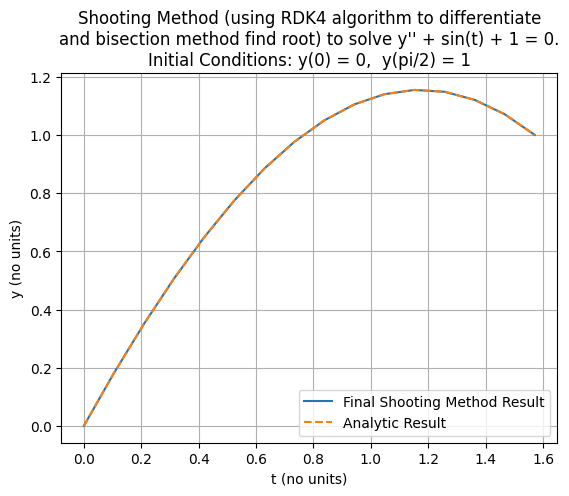

In [3]:
def shooting(function, interval, initial_guess, steps):
    
    '''This function solves the DE through the use of the RK4 algorithm determined in q1c. Instead of being given all of the initial conditions,
        we were only given the first and final condition, so the way this function works is that it takes in two "guesses" for what y'(0) is,
        and then compares the final result to the given condition. Then a root-finding algorithm (bisection method) is used to find the most
        ideal y'(0) value through many iterations in which the final result becomes closer and closer to the true answer.'''
    
    a, b = initial_guess[0], initial_guess[1]                                                                           #inputted initial guesses
    position = np.array([0,a])                                                                                          #setting a position with one of the initial guesses
    t, output = RK4(function, interval, position, steps)                                                                      #getting our first output
    print("Iteration number: %0.2i\tCurrent y(𝜋/2) = %0.9f\tCurrent y'(0) = %0.9f\n"%(0, output[-1], position[1]))      #printing results
    
    #setting variables we will use later
    counter = 0
    tolerance = 0.0000001
    
    while abs(output[-1]-1) > tolerance:                        #while answer-1 is greater then tolerance value, keep looping
        
        c = (a + b)/2                                           #this gives the midpoint between our two guesses
        position = np.array([0,c])                              #updates y'(0) in state vector
        t, output = RK4(function, interval, position, dt)       #gets new output
        
        if output[-1] < 1:                                      #if result is lower then what we're expecting...
            a = c                                               #set our "a" guess to c
        else:
            b = c                                               #otherwise, set our "b" guess to c
        counter += 1
        
        print("Iteration number: %0.2i\tCurrent y(𝜋/2) = %0.9f\tCurrent y'(0) = %0.9f"%(counter, output[-1], position[1]))  #printing results each iteration
        
    return t, output, position

interval = np.array([0,np.pi/2])                                #[0, pi/2] interval
initial_guesses = np.array([1.0,2.0])                           #two initial guesses above and below real answer
dt = int(np.pi/2 / 0.1)                                         #created an arbitrary amount of steps

t, output, yp = shooting(dS, interval, initial_guesses, dt)     #output data
analytic = (np.pi/4)*t - 0.5*t**2 + np.sin(t)                   #c1 = 0, c2 = pi/4

print("\ny(𝜋/2) = %0.9f with analytic method, y(𝜋/2) = %0.9f with shooting method."%(analytic[-1], output[-1])) #printing analytic method result to compare the two

#this plots and compares analytic and shooting algorithmn results
plt.figure()
plt.title("Shooting Method (using RDK4 algorithm to differentiate\nand bisection method find root) to solve y'' + sin(t) + 1 = 0.\nInitial Conditions: y(0) = 0,  y(pi/2) = 1")
plt.xlabel('t (no units)')
plt.ylabel('y (no units)')
plt.plot(t, output)
plt.plot(t, analytic, '--')
plt.grid('True')
plt.legend(['Final Shooting Method Result', 'Analytic Result'], loc = 'lower right')
plt.show()

b. [8 pts] Repeat question a using a finite difference method with a varying number of grid points
$(5,10,20,50)$

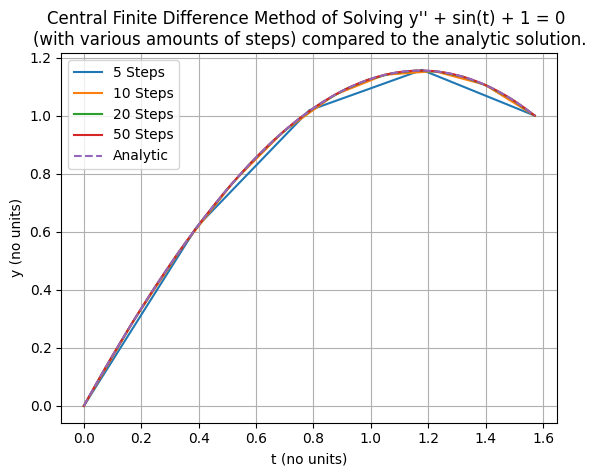

In [4]:
def cfd_3pt(interval, steps):
    
    '''This function uses a 3pt central finite difference method to solve this differential equation. All that needs to be inputted is an
     interval and the desired amount of steps to be taken. '''
    
    t = np.linspace(interval[0], interval[1], steps)
    output = np.zeros_like(t)
    dt = (interval[1] - interval[0]) / (steps - 1)   #step size

    # Construct the finite difference matrix (square matrix)
    A = np.zeros((steps, steps))
    A[0, 0] = 1                                #Enforces boundary condition at t = 0
    A[-1, -1] = 1                              #Enforces boundary condition at t = pi/2

    #f''(x) = [ f(x+h) - 2f(x) + f(x-h) ] / h^2
    for i in range(1, steps - 1):
        A[i, i + 1] = 1 / dt**2
        A[i, i] = -2 / dt**2
        A[i, i - 1] = 1 / dt**2

    #Construct column vector
    column_vector = -np.sin(t) - 1
    column_vector[0] = 0.0                      #Enforces boundary condition at t = 0
    column_vector[-1] = 1.0                     #Enforces boundary condition at t = pi/2

    output = np.linalg.solve(A, column_vector)  #Solves the system of equations

    return t, output

interval = np.array([0,np.pi/2]) 
step_count = [5, 10, 20, 50]                     #various step totals we tested

#initializing our plot
plt.figure()
plt.title("Central Finite Difference Method of Solving y'' + sin(t) + 1 = 0 \n(with various amounts of steps) compared to the analytic solution.")
plt.xlabel('t (no units)')
plt.ylabel('y (no units)')
plt.grid('True')

#runs cfd_3pt function at various amounts of steps
for n_steps in step_count:
    t, y = cfd_3pt(interval, n_steps)
    plt.plot(t, y)

#creates the analytic plot
t = np.linspace(interval[0],interval[1],1000)
analytic = np.pi/4*t-0.5*t**2+np.sin(t)
plt.plot(t, analytic, '--')

plt.legend(['5 Steps', '10 Steps', '20 Steps', '50 Steps', 'Analytic'], loc='upper left')
plt.show()



---------

### Question 3

The deflection 𝑦(𝑥) of a 1-D beam is governed by the following ODE:

$$𝐸𝐼 \frac{𝑑^2𝑦}{𝑑𝑥^2} = \frac{1}{2} 𝜔_0(𝐿𝑥 − 𝑥^2) \Bigg[1 + \bigg(\frac{𝑑𝑦}{𝑑𝑥}\bigg)^2\Bigg]^{3/2} $$

where:
- $𝐸𝐼$ is a parameter known as the “flexural rigidity” that depends on the material and its cross-section
- $𝐿$ is the length of the beam
- $𝜔_0$ is the load per unit length applied to the beam

If $𝐿 = 5$ m,   $𝐸𝐼 = 1.8 × 10^7$   $Nm^2$,   $𝜔_0 = 1.5 × 10^4 \frac{N}{m}$ and $𝑦(0) = 𝑦(𝐿) = 0$, find the beam deflection $𝑦(𝑥)$ on the interval $[0, 𝐿]$. 

[https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.06-Summary-and-Problems.html question 10]

Below is a diagram showing the problem we are trying to solve. This ODE represents the deflection of a bridge, otherwise referred to as a 1D-Beam.
As can be seen, L is the length of the beam, w0 is the load per unit width applied to the beam, and and x/y represent the position of the bridge.

Image Source: Question 10 of Chapter 23: Ordinary Differential equation - Boundary Value Problems in the "Python Numerical Methods Textbook" found at       
https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter23.06-Summary-and-Problems.html


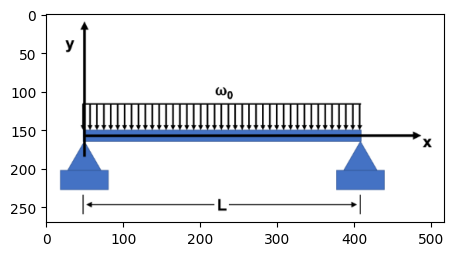

In [5]:
#image display function given to us in the previous assignment
def display_img(img1,img2=None):
    
    """
    Display 1 or 2 RGB or RGBA images in matplotlib format side-by-side inline in Jupyter.
    For 1 image, call with only one parameter.
    Disable any resizing of the images; show them at the exact resolution of the image without rescaling the pixel size.
    """
    
    dpi = matplotlib.rcParams['figure.dpi']  # dots per inch of the device
    height = img1.shape[0]
    width = img1.shape[1]
    if img2 is None:   # Only one figure provided
        figsize = width / float(dpi), height / float(dpi)
        plt.figure(figsize=figsize)
        plt.imshow(img1)
    else:                # 2 Figures provided
        height=np.max([height,img2.shape[0]])
        width=width+img2.shape[1]
        figsize = width / float(dpi), height / float(dpi)
        f, ax=plt.subplots(1,2,figsize=figsize)
        ax[0].imshow(img1)
        ax[1].imshow(img2)

original = plt.imread('diagram.png')
display_img(original)

print("Below is a diagram showing the problem we are trying to solve. This ODE represents the deflection of a bridge, otherwise referred to as a 1D-Beam.")
print("As can be seen, L is the length of the beam, w0 is the load per unit width applied to the beam, and and x/y represent the position of the bridge.\n")
print("Image Source: Question 10 of Chapter 23: Ordinary Differential equation - Boundary Value Problems in the \"Python Numerical Methods Textbook\" found at \
      \nhttps://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter23.06-Summary-and-Problems.html")

Iteration number: 00	Current y(L) = -0.977028339	Current y'(0) = -0.200000000

Iteration number: 01	Current y(L) = 0.021701891	Current y'(0) = 0.000000000
Iteration number: 02	Current y(L) = -0.477993151	Current y'(0) = -0.100000000
Iteration number: 03	Current y(L) = -0.228227217	Current y'(0) = -0.050000000
Iteration number: 04	Current y(L) = -0.103283013	Current y'(0) = -0.025000000
Iteration number: 05	Current y(L) = -0.040795647	Current y'(0) = -0.012500000
Iteration number: 06	Current y(L) = -0.009548149	Current y'(0) = -0.006250000
Iteration number: 07	Current y(L) = 0.006076553	Current y'(0) = -0.003125000
Iteration number: 08	Current y(L) = -0.001735878	Current y'(0) = -0.004687500
Iteration number: 09	Current y(L) = 0.002170318	Current y'(0) = -0.003906250
Iteration number: 10	Current y(L) = 0.000217215	Current y'(0) = -0.004296875
Iteration number: 11	Current y(L) = -0.000759332	Current y'(0) = -0.004492188
Iteration number: 12	Current y(L) = -0.000271059	Current y'(0) = -0.

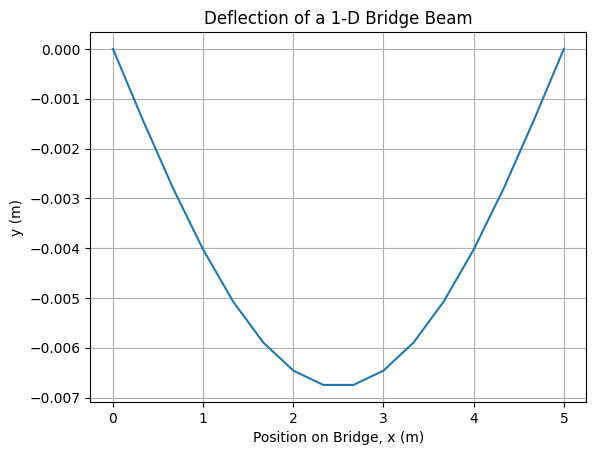

In [6]:
L = 5           #m
EI = 1.8e7      #Nm^2
w0 = 1.5e4      #N/m

def ODE_q3(S_vector, x):

    '''This function returns the ODE we are given at the start of this question. Just needs a state vector and x vector.'''

    result = (0.5*w0*(L*x - x**2)*(1 + S_vector[1]**2)**(3/2))/EI
    return(np.array([S_vector[1], result]))

def shooting_v2(function, interval, initial_guess, steps):
    
    '''Very similar function to the one used to solve q2a. Only differences are the print statements and boundary conditions being adapted
    to solve this problem instead, however all the computational logic is the same.'''

    a, b = initial_guess[0], initial_guess[1]                                                                         #inputted initial guesses
    position = np.array([0,a])                                                                                        #setting a position with one of the initial guesses
    t, output = RK4(function, interval, position, steps)                                                              #getting our first output
    print("Iteration number: %0.2i\tCurrent y(L) = %0.9f\tCurrent y'(0) = %0.9f\n"%(0, output[-1], position[1]))      #printing results
    
    #setting variables we will use later
    counter = 0
    tolerance = 0.0000001
    
    while abs(output[-1]) > tolerance:                        #while answer is greater then tolerance value, keep looping
        
        c = (a + b)/2                                         #this gives the midpoint between our two guesses
        position = np.array([0,c])                            #updates y'(0) in state vector
        t, output = RK4(function, interval, position, dt)     #gets new output
        
        if output[-1] < 0:                                    #if result is lower then what we're expecting...
            a = c                                             #set our "a" guess to c
        else:
            b = c                                             #otherwise, set our "b" guess to c
        counter += 1
        
        print("Iteration number: %0.2i\tCurrent y(L) = %0.9f\tCurrent y'(0) = %0.9f"%(counter, output[-1], position[1]))  #printing results each iteration
        
    return t, output, position

interval = np.array([0,L])                                      #[0, L] interval
initial_guess =np.array([-.2,.2])                               #two initial guesses above and below real answer
steps = 10000                                                   #created an arbitrary amount of steps
                
x, y, yp = shooting_v2(ODE_q3, interval, initial_guess, steps)  #output data

#print statements summarizing results
print("\nThe estimated function y(x), found using the shooting method (which in itself uses the Runge-Kutta differentiation technique and the bisection root-finding method).\n")
print("The maximum beam deflection was found to be about %0.8f m, or %0.2f mm."%(np.max(abs(y)),np.max(abs(y))*1000 ))

#plotting instructions
plt.figure()
plt.plot(x,y)
plt.title("Deflection of a 1-D Bridge Beam")
plt.xlabel('Position on Bridge, x (m)')
plt.ylabel('y (m)')
plt.grid('True')
plt.show()